In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from Plasma import Plasma_Evolver
from Analyzer import Plasma_Analyzer, Plasma_Plotter
from numpy.fft import fft, ifft
import math

In [3]:
def delta_freq(delta):
    return np.sqrt(1 - ((2 * delta) / (1 + 4*delta**2))**2)

In [31]:
N = 2
dt = 0.05
epsilon = 0.2
delta = 0.05
tmax = 183 * 1

driver = Plasma_Evolver(N, dt, epsilon_in=epsilon, delta_in=delta, insertion=False, rk = True, N_streams=1)
driver.evolve_plasma(tmax)
analyzer = Plasma_Analyzer(driver)



Text(0, 0.5, 'Position')

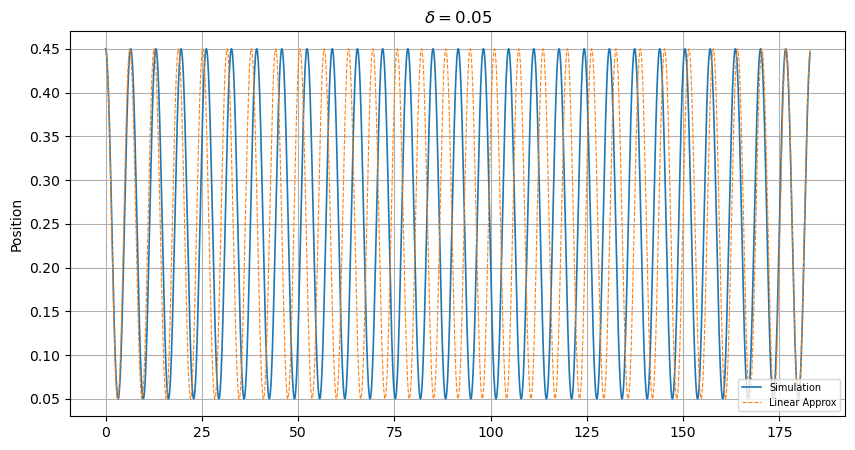

In [32]:
t = np.arange(0, tmax + dt, dt)
plot_t = 183.5

fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.set_title(r"$\delta = {}$".format(delta))
pred = epsilon * np.cos(delta_freq(delta) * t) + 0.25
ax.plot(t[0:int(plot_t / dt)], analyzer.get_particle_pos(0,0)[0:int(plot_t / dt)], linewidth=1.2, linestyle='-', label='Simulation')
ax.plot(t[0:int(plot_t / dt)], pred[0:int(plot_t / dt)], linewidth=0.8, linestyle='--', label='Linear Approx') 
ax.grid()
ax.legend(fontsize=7, loc="lower right")
ax.set_ylabel("Position", fontsize=10)

In [6]:
def lcm(a, b):
    return abs(int(a * b)) // math.gcd(int(a), int(b))

Freq def = 0.005462988254575253
Prediction Frequency: 0.15296367112810708. Period: 6.538
Simulation Frequency: 0.14750068287353182. Period: 6.78


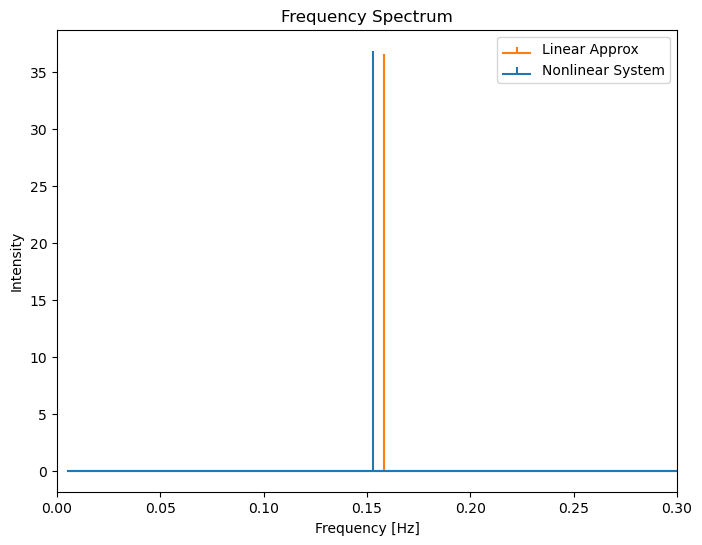

In [33]:
n = len(t)

sim_hat = fft(analyzer.get_particle_pos(0,0), n)
sim_PSD = sim_hat * np.conj(sim_hat) / n

pred_hat = fft(pred, n)
pred_PSD = pred_hat * np.conj(pred_hat) / n

ind = np.nonzero(pred_PSD)

print(f"Freq def = {1 / (dt * n)}")

freq = (1 / (dt * n)) * np.arange(n)
L = np.arange(1, np.floor(n/2), dtype='int')

pred_ind = np.asarray(pred_PSD > 10).nonzero()
sim_ind = np.asarray(sim_PSD > 10).nonzero()

max_pred = np.argmax(pred_PSD[L])
max_sim = np.argmax(sim_PSD[L])

period_pred = round(1 / freq[max_pred], 3)
period_sim = round(1 / freq[max_sim], 3)


print(f'Prediction Frequency: {freq[max_pred]}. Period: {period_pred}')
print(f'Simulation Frequency: {freq[max_sim]}. Period: {period_sim}')

fig, axs = plt.subplots(1,1, figsize=(8,6))

axs.set_xlabel("Frequency [Hz]")
axs.set_ylabel("Intensity")
axs.set_title("Frequency Spectrum")

plt.sca(axs)
plt.stem(freq[L], pred_PSD[L], markerfmt=" ", linefmt="C1-", basefmt="C1-", label="Linear Approx")
plt.stem(freq[L], sim_PSD[L], markerfmt= " ", linefmt="C0-", basefmt="C0-", label="Nonlinear System")
plt.xlim(0,0.3)
plt.legend()


plt.show()

In [8]:
deltas = np.linspace(0, 0.1, 10)
epsilons = np.linspace(0, 0.1, 10)

